In [72]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os

with open('/Users/jonathan/PycharmProjects/marlo/mc_find/mc_QTableBackUp.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 193


[3, 2, 1, 0, 4, 5, 6]
[0, 2, 1, 3, 4, 5, 6]
[0, 90, 180, 270]
/Users/jonathan/PycharmProjects/marlo/mc_find/mc_QTable_Gamma_1_Decay_0_97.json
Length of QTable: 197


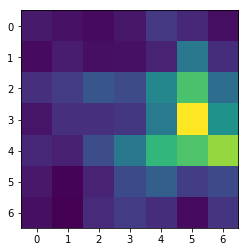

In [86]:
file_list = [
    "/Users/jonathan/PycharmProjects/marlo/mc_find/mc_QTable_Gamma_1_Decay_0_97.json"]

xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)


def printGrid(xs,zs,Qtable):

    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])

        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(grid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_xticklabels([str(i) for i in range(xLen+1)])
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_yticklabels([str(i) for i in range(xLen+1)])
    
    

for file in file_list:
    print(file)
    with open(file) as f:
        Qtable = json.load(f)
    print("Length of QTable: " + str(len(Qtable))) 
    printGrid(xs,zs,Qtable)


In [87]:
def plotScores(file):
    my_data = genfromtxt(file, delimiter=',')
    scores = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    
    plt.plot(epsilon)

    print("Games: " , str(len(scores)), " - Average Time: ", str(sum(time)/len(scores)))
    print("Average reward for the last 5 games: %.2f with an epsilon of %.2f" % (sum(scores[-5:])/5, epsilon[-1]))
    plt.plot(scores);

    lowCount = 0
    highCount = 0
    for score in scores:
        if score < -2.4:
            lowCount += 1
        if score > 0:
            highCount += 1
    print("Scores that have reached over 0: %s out of %s"%(highCount,len(scores)))
    print("Scores that have reached -2.5: %s out of %s"%(lowCount,len(scores)))
    
    averageScores = []
    for i,score in enumerate(scores):
        averageScores.append((sum(scores[:(i+1)])/(i+1)))

    plt.plot(averageScores);
    plt.title("Scores for %s games - total average score is %.3f"%(len(averageScores),averageScores[-1]));
    plt.xlabel("Game");
    plt.ylabel("Score");
    plt.axhline(0,color="grey",linestyle="--")

Games:  71  - Average Time:  339.2957746478873
Average reward for the last 5 games: 0.36 with an epsilon of 0.12
Scores that have reached over 0: 46 out of 71
Scores that have reached -2.5: 2 out of 71


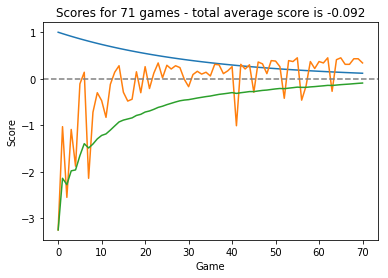

In [90]:
plotScores("/Users/jonathan/PycharmProjects/marlo/mc_find/mc_Results_Gamma_1_Decay_0_97.csv")



In [88]:
plotScores("/Users/jonathan/PycharmProjects/marlo/mc_find/mc_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv")

OSError: /Users/jonathan/PycharmProjects/marlo/mc_find/mc_Results_Alpha_0_8_Gamma_1_Decay_0_97.csv not found.

In [89]:
for key in Qtable:
    values = Qtable[key]
    reward = max(Qtable[key])
    if reward > 0:
        print(key)

2:2:90:55:0
1:2:180:55:0
4:3:90:55:0
1:4:270:55:0
0:4:90:55:0
2:3:0:55:0
2:2:0:55:0
2:1:0:55:0
2:0:0:55:0
3:1:180:55:0
2:1:270:55:0
1:5:0:55:0
2:3:180:55:0
2:2:180:55:0
4:3:180:55:0
4:2:180:55:0
4:3:270:55:0
3:3:270:55:0
2:4:180:55:0
2:4:270:55:0
1:5:180:55:0
1:5:270:55:0
3:2:270:55:0
2:6:270:55:0
2:6:180:55:0
2:6:0:55:0
2:6:90:55:0
3:6:90:55:0
2:5:180:55:0
2:4:90:55:0
3:4:180:55:0
3:4:270:55:0
4:4:270:55:0
5:4:270:55:0
5:4:180:55:0
5:5:270:55:0
5:4:90:55:0
4:4:90:55:0
4:4:180:55:0
3:3:180:55:0
4:0:0:55:0
4:1:0:55:0
5:2:270:55:0
5:3:270:55:0
5:3:90:55:0
4:3:0:55:0
4:4:0:55:0
4:5:0:55:0
4:6:0:55:0
1:6:180:55:0
1:5:90:55:0
2:5:270:55:0
2:5:0:55:0
4:2:0:55:0
4:2:270:55:0
3:4:0:55:0
3:2:180:55:0
5:3:180:55:0
6:3:270:55:0
6:3:0:55:0
6:3:90:55:0
4:5:90:55:0
3:5:180:55:0
3:5:270:55:0
6:3:180:55:0
4:5:180:55:0
4:6:180:55:0
4:5:270:55:0
2:5:90:55:0
2:4:0:55:0
3:6:270:55:0
4:6:270:55:0
4:0:0:56:0
4:6:90:55:0
3:5:0:55:0
3:5:90:55:0
3:6:0:55:0
3:6:180:55:0
5:6:270:55:0
2:0:0:56:0
